In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN,KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import load_breast_cancer,fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

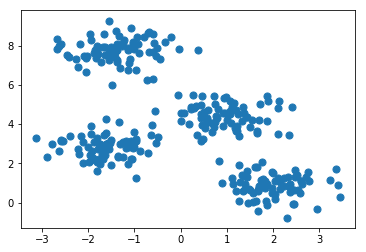

In [2]:
X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [3]:
scan = DBSCAN()
scan

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [4]:
y_scan = scan.fit_predict(X)

In [5]:
y_scan

array([ 2,  0,  1,  0,  2, -1,  3,  1,  0,  0,  3,  0,  1,  0,  2,  1,  1,
        2,  3,  3,  2,  2,  1,  3,  3, -1,  2,  1,  3,  1,  0,  0,  1,  0,
        0,  0,  0,  0,  3,  2,  1,  3, -1,  1,  3,  3,  0,  3,  0,  2,  3,
        2,  0,  2,  2,  3,  0,  3,  0,  2,  0,  1, -1,  3,  3,  3,  0,  2,
        0,  3,  1,  3,  0,  3,  3,  0,  3,  1,  2,  0,  2,  1,  2,  2,  0,
        1,  2,  1, -1,  0,  1,  2,  0,  3,  3,  1,  2,  2,  1,  3,  0,  2,
        0,  2,  1,  2,  2,  1,  0,  1,  3,  3,  2,  0,  2,  1,  0,  2,  2,
        1,  3,  2,  3,  2,  2,  2,  2,  3,  2,  3,  0,  3,  3,  2,  0,  3,
        3,  0,  1,  0,  0,  3,  1, -1,  1,  3,  0,  1,  0,  0,  0,  1, -1,
        1,  2,  3,  0,  3,  2,  1,  0,  1,  1,  2,  1,  3, -1,  1,  2,  1,
        1,  0,  2,  1, -1,  0,  2,  2,  1,  3,  2,  1,  3,  3,  1,  1,  1,
        1,  2,  0,  1,  3,  1,  1,  3,  3,  3,  1,  3,  0,  1,  3,  2,  3,
        1, -1,  3,  0,  1,  0,  1,  3,  1,  1,  0,  3,  3,  2, -1,  1,  0,
        2,  2,  3,  2,  3

In [6]:
num_clusters = len(np.unique(y_scan))
num_clusters

5

In [7]:
np.bincount(y_scan +1)

array([18, 69, 72, 70, 71], dtype=int64)

In [8]:
cancer_data = load_breast_cancer()

In [9]:
scaler = StandardScaler().fit(cancer_data.data)
X_cancer = scaler.transform(cancer_data.data)

In [10]:
scan = DBSCAN()
scan_cancer = scan.fit_predict(X_cancer)

In [11]:
len(np.bincount(scan_cancer + 1))

1

In [12]:
def apply_dbscan(data,min_clusters,min_samples=[1,2,3,4,5],eps=[0.5,1.0,1.5,2.0]):
    for i in range(len(min_samples)):
        for j in range(len(eps)):
            scan = DBSCAN(eps=eps[j],min_samples=min_samples[i])
            scan_data = scan.fit_predict(data)
            if(len(np.bincount(scan_data + 1)) > min_clusters):
                print('eps=',eps[j],'min_samples=',min_samples[i],'num_clusters =',len(np.bincount(scan_data + 1)),
                      'clusters=',np.bincount(scan_data + 1))
    
    


In [13]:
apply_dbscan(X_cancer,2,min_samples = [1,2,3,4,5],eps = [3.0,3.5,4.0,4.5,5,5.5,6,10,11,12,13,14,15])

eps= 3.0 min_samples= 1 num_clusters = 109 clusters= [  0   1 454   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   2   1   1   1   1   1   1   1   4   1   1   2
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1]
eps= 3.5 min_samples= 1 num_clusters = 70 clusters= [  0   1 500   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1]
eps= 4.0 min_samples= 1 num_clusters = 42 clusters= [  0   1 528   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1 

In [14]:
scan = DBSCAN(eps=5.5,min_samples=2)
scan_cancer = scan.fit_predict(X_cancer)
print(np.bincount(scan_cancer + 1))

[ 13 554   2]


In [15]:
np.argwhere(scan_cancer == 1)

array([[504],
       [505]], dtype=int64)

In [17]:
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [18]:
def display_dbscan_images(labels,data,targets,max_images=10):
    for cluster in range(max(labels) + 1):
        mask = (labels == cluster)
        num_images = np.sum(mask)
        if(num_images > max_images):
            continue
        fig, axes = plt.subplots(1, num_images, figsize=(num_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
        for image, label, ax in zip(data[mask], targets[mask], axes):
            ax.imshow(image.reshape(image_shape),cmap='gray')
            ax.set_title(people.target_names[label].split()[-1])

In [19]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
people_data_filtered = people.data[mask]
people_target_filtered = people.target[mask]
image_shape = people.images[0].shape

In [20]:
pca = PCA(n_components=100, whiten=True, random_state=0)
X_scaled = people_data_filtered/255.
X_pca = pca.fit_transform(X_scaled)
print("X_pca.shape: {}".format(X_pca.shape))

X_pca.shape: (2063, 100)


In [21]:
apply_dbscan(X_pca,2,min_samples = [1,2,3,4,5],eps = [3.0,3.5,4.0,4.5,5,5.5,6,7,10,11,12])

eps= 3.0 min_samples= 1 num_clusters = 2063 clusters= [0 1 1 ... 1 1 1]
eps= 3.5 min_samples= 1 num_clusters = 2063 clusters= [0 1 1 ... 1 1 1]
eps= 4.0 min_samples= 1 num_clusters = 2063 clusters= [0 1 1 ... 1 1 1]
eps= 4.5 min_samples= 1 num_clusters = 2062 clusters= [0 1 1 ... 1 1 1]
eps= 5 min_samples= 1 num_clusters = 2061 clusters= [0 1 1 ... 1 1 1]
eps= 5.5 min_samples= 1 num_clusters = 2055 clusters= [0 1 1 ... 1 1 1]
eps= 6 min_samples= 1 num_clusters = 2046 clusters= [0 1 1 ... 1 1 1]
eps= 7 min_samples= 1 num_clusters = 1991 clusters= [0 1 1 ... 1 1 1]
eps= 10 min_samples= 1 num_clusters = 752 clusters= [   0    1 1289    1    1    1    1    1    1    1    1    1    1    1
    1    2    1    1    1    1    2    1    1    1    1    1    1    1
    1    2    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    2    2    1    3    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1   

In [22]:
dbscan = DBSCAN(min_samples=3,eps=7)
clusters = dbscan.fit_predict(X_pca)
print("unique labels: {}".format(np.unique(clusters)))
print("number of points per cluster: {}".format(np.bincount(clusters + 1)))

unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
number of points per cluster: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]


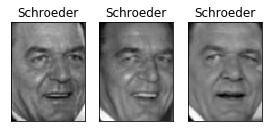

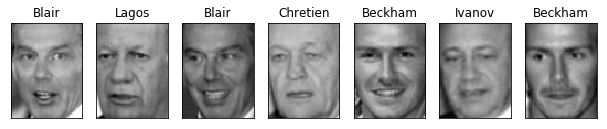

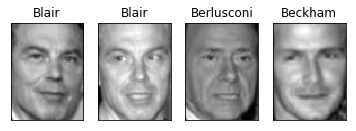

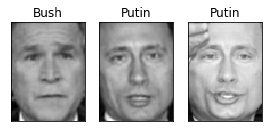

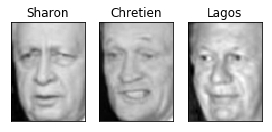

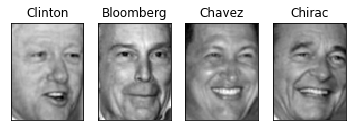

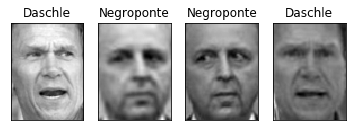

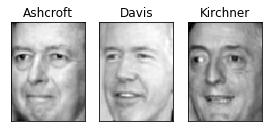

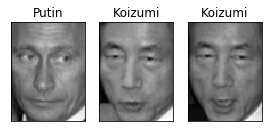

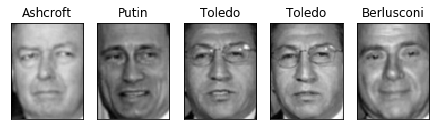

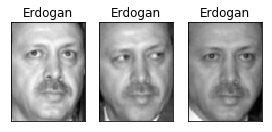

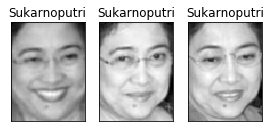

In [23]:
display_dbscan_images(clusters,people_data_filtered,people_target_filtered)

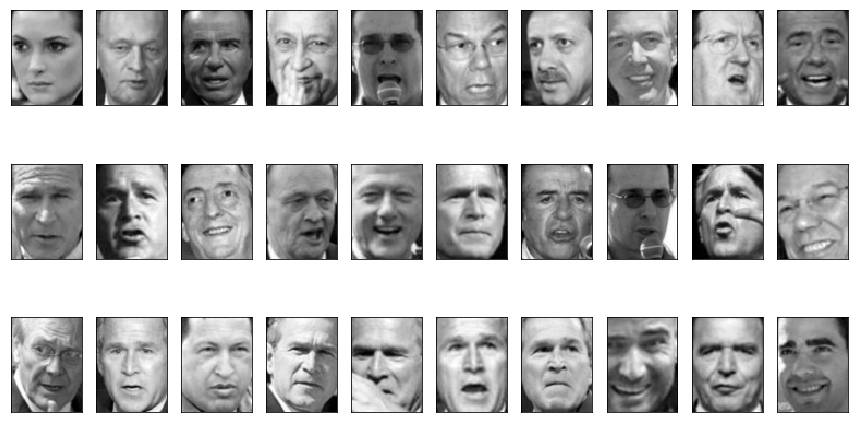

In [24]:
image_shape = people.images[0].shape
fig, axes = plt.subplots(3,10,figsize=(15, 8),subplot_kw=dict(xticks=[], yticks=[]))
noise = people_data_filtered[clusters == -1]
for image,ax in zip(noise,axes.ravel()):
    ax.imshow(image.reshape(image_shape), cmap='gray')

In [25]:
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
print("X_tsne.shape: {}".format(X_tsne.shape))

X_tsne.shape: (2063, 2)


In [26]:
apply_dbscan(X_tsne,2,min_samples = [1,2,3,4,5],eps = [3.0,3.5,4.0,4.5,5,5.5,6,7,10,11,12])

eps= 3.0 min_samples= 1 num_clusters = 33 clusters= [   0 1986    2    5    1    9    1    8    1    1    2    3    2    8
    1    3    3    2    2    2    1    3    2    2    2    1    2    2
    2    1    1    1    1]
eps= 3.5 min_samples= 1 num_clusters = 24 clusters= [   0 2006    2    7    1    1    8    1    1    3    8    1    3    2
    2    2    1    3    2    2    2    2    2    1]
eps= 4.0 min_samples= 1 num_clusters = 18 clusters= [   0 2028    2    1    8    1    1    3    2    2    1    3    2    2
    2    2    2    1]
eps= 4.5 min_samples= 1 num_clusters = 15 clusters= [   0 2040    1    1    1    3    2    1    3    2    2    2    2    2
    1]
eps= 5 min_samples= 1 num_clusters = 9 clusters= [   0 2049    1    1    3    2    3    2    2]
eps= 5.5 min_samples= 1 num_clusters = 7 clusters= [   0 2054    1    1    3    2    2]
eps= 6 min_samples= 1 num_clusters = 5 clusters= [   0 2059    1    1    2]
eps= 7 min_samples= 1 num_clusters = 4 clusters= [   0 2060    1    2

In [27]:
dbscan = DBSCAN(min_samples=3, eps=3)
labels = dbscan.fit_predict(X_tsne)

In [28]:
print("unique labels: {}".format(np.unique(labels)))
print("number of points per cluster: {}".format(np.bincount(labels + 1)))

unique labels: [-1  0  1  2  3  4  5  6  7  8]
number of points per cluster: [  35 1986    5    9    8    3    8    3    3    3]


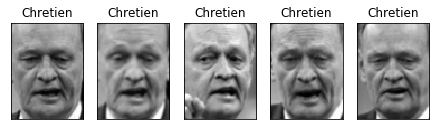

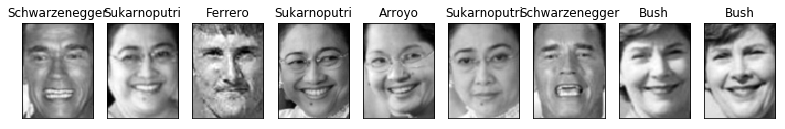

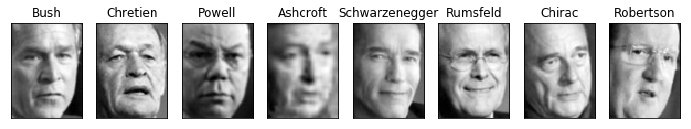

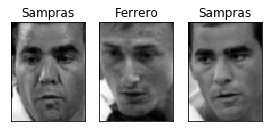

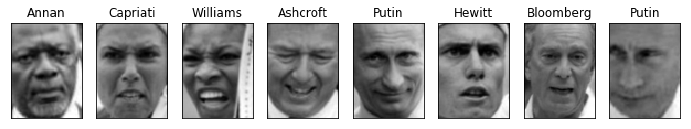

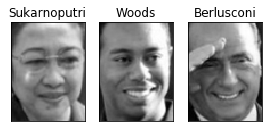

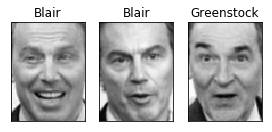

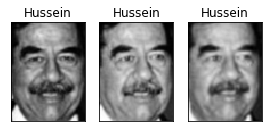

In [29]:
display_dbscan_images(labels,people_data_filtered,people_target_filtered)

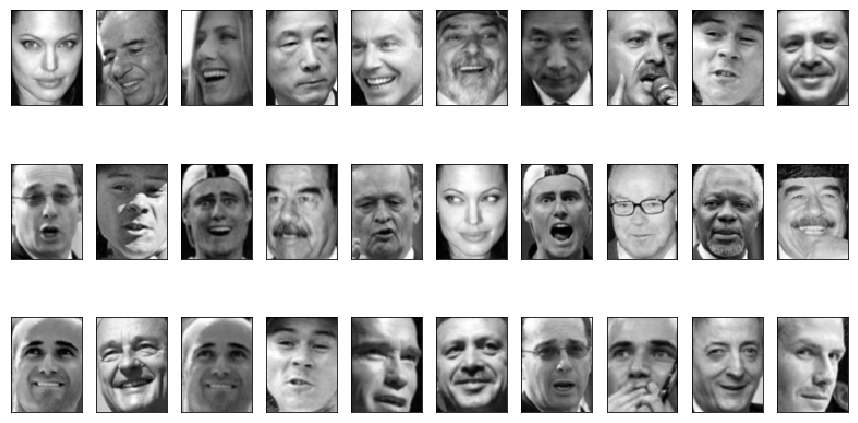

In [30]:
image_shape = people.images[0].shape
fig, axes = plt.subplots(3,10,figsize=(15, 8),subplot_kw=dict(xticks=[], yticks=[]))
noise = people_data_filtered[labels == -1]
for image,ax in zip(noise,axes.ravel()):
    ax.imshow(image.reshape(image_shape), cmap='gray')